In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime as dt
import itertools

In [6]:
f = open('HomeB-meter1_2015.csv')
data = pd.read_csv(f,sep=',', header='infer', parse_dates=[1])
data = data.drop(data.columns[[1,2]],axis=1)
data.columns


#data['Microwave[kW]'].type()

Index(['Date & Time', 'Grid [kW]', 'AC [kW]', 'Furnace [kW]',
       'Cellar Lights [kW]', 'Washer [kW]', 'First Floor lights [kW]',
       'Utility Rm + Basement Bath [kW]', 'Garage outlets [kW]',
       'MBed + KBed outlets [kW]', 'Dryer + egauge [kW]',
       'Panel GFI (central vac) [kW]', 'Home Office (R) [kW]',
       'Dining room (R) [kW]', 'Microwave (R) [kW]', 'Fridge (R) [kW]'],
      dtype='object')

In [7]:
data['Time'] = pd.to_datetime(data['Date & Time'])
print(type(data['Time'][1]))

<class 'pandas.tslib.Timestamp'>


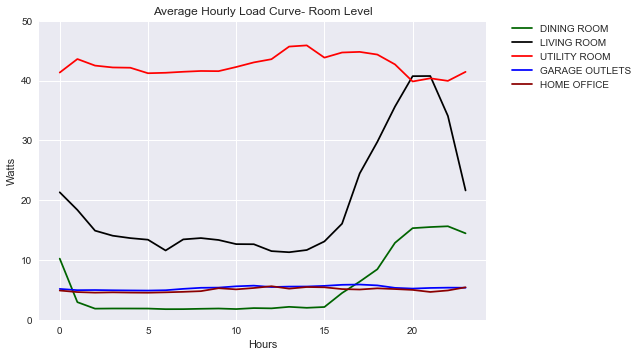

In [10]:
data['HrOfD'] = data['Time'].dt.hour
hourlyDemand = data.groupby(data['HrOfD']).mean()

hourlyDemand['DR'] = ((hourlyDemand['Dining room (R) [kW]'])*1000)
hourlyDemand['LR'] = ((hourlyDemand['First Floor lights [kW]'])*1000)
hourlyDemand['BR'] = ((hourlyDemand['Utility Rm + Basement Bath [kW]'])*1000)
hourlyDemand['GR'] = ((hourlyDemand['Garage outlets [kW]'])*1000)
hourlyDemand['OR'] = ((hourlyDemand['Home Office (R) [kW]'])*1000)


plt.plot(hourlyDemand['DR'],color='darkgreen', label='DINING ROOM')
#plt.plot(hourlyDemand['MR'],color='cyan', label='MASTER BED ROOM')
plt.plot(hourlyDemand['LR'],color='black', label='LIVING ROOM')
plt.plot(hourlyDemand['BR'],color='red', label='UTILITY ROOM')
plt.plot(hourlyDemand['GR'],color='blue', label='GARAGE OUTLETS')
plt.plot(hourlyDemand['OR'],color='darkred', label='HOME OFFICE')
plt.title("Average Hourly Load Curve- Room Level")
plt.ylim(0.00, 50.0)
plt.xlabel("Hours")
plt.ylabel("Watts")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [39]:
data.columns

Index(['Date & Time', 'Grid [kW]', 'AC [kW]', 'Furnace [kW]',
       'Cellar Lights [kW]', 'Washer [kW]', 'First Floor lights [kW]',
       'Utility Rm + Basement Bath [kW]', 'Garage outlets [kW]',
       'MBed + KBed outlets [kW]', 'Dryer + egauge [kW]',
       'Panel GFI (central vac) [kW]', 'Home Office (R) [kW]',
       'Dining room (R) [kW]', 'Microwave (R) [kW]', 'Fridge (R) [kW]', 'Time',
       'HrOfD'],
      dtype='object')

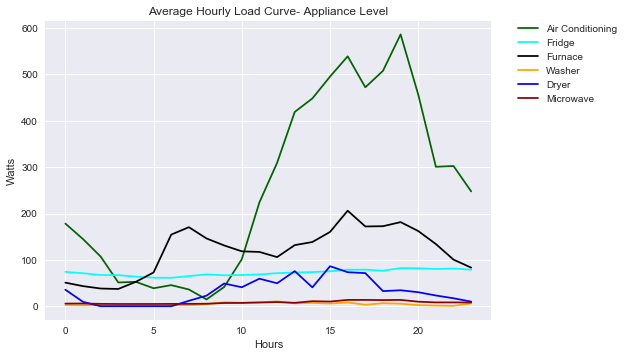

In [9]:
data['HrOfD'] = data['Time'].dt.hour
hourlyDemand = data.groupby(data['HrOfD']).mean()
hourlyDemand['AC'] = ((hourlyDemand['AC [kW]'])*1000)
hourlyDemand['Furnace'] = ((hourlyDemand['Furnace [kW]'])*1000)
hourlyDemand['Washer'] = ((hourlyDemand['Washer [kW]'])*1000)
hourlyDemand['Dryer'] = ((hourlyDemand['Dryer + egauge [kW]'])*1000)
hourlyDemand['MW'] = ((hourlyDemand['Microwave (R) [kW]'])*1000)
hourlyDemand['Fridge'] = ((hourlyDemand['Fridge (R) [kW]'])*1000)

plt.plot(hourlyDemand['AC'],color='darkgreen', label='Air Conditioning')
plt.plot(hourlyDemand['Fridge'],color='cyan', label='Fridge')
plt.plot(hourlyDemand['Furnace'],color='black', label='Furnace')
plt.plot(hourlyDemand['Washer'],color='orange', label='Washer')
plt.plot(hourlyDemand['Dryer'],color='blue', label='Dryer')
plt.plot(hourlyDemand['MW'],color='darkred', label='Microwave')
plt.title("Average Hourly Load Curve- Appliance Level")
#plt.ylim(0.00, 200.0)
plt.xlabel("Hours")
plt.ylabel("Watts")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



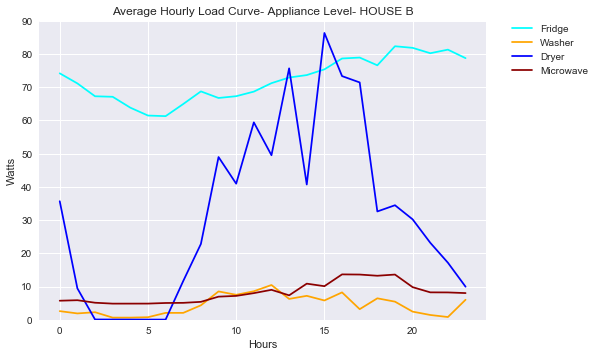

In [56]:
hourlyDemand['AC'] = ((hourlyDemand['AC [kW]'])*1000)
hourlyDemand['Furnace'] = ((hourlyDemand['Furnace [kW]'])*1000)
hourlyDemand['Washer'] = ((hourlyDemand['Washer [kW]'])*1000)
hourlyDemand['Dryer'] = ((hourlyDemand['Dryer + egauge [kW]'])*1000)
hourlyDemand['MW'] = ((hourlyDemand['Microwave (R) [kW]'])*1000)
hourlyDemand['Fridge'] = ((hourlyDemand['Fridge (R) [kW]'])*1000)

#plt.plot(hourlyDemand['AC'],color='darkgreen', label='Air Conditioning')
plt.plot(hourlyDemand['Fridge'],color='cyan', label='Fridge')
#plt.plot(hourlyDemand['Furnace'],color='black', label='Furnace')
plt.plot(hourlyDemand['Washer'],color='orange', label='Washer')
plt.plot(hourlyDemand['Dryer'],color='blue', label='Dryer')
plt.plot(hourlyDemand['MW'],color='darkred', label='Microwave')
plt.title("Average Hourly Load Curve- Appliance Level- HOUSE B")
plt.ylim(0.00, 90.0)
plt.xlabel("Hours")
plt.ylabel("Watts")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()